In [1216]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [1217]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1218]:
data= pd.read_csv("C:/Users/ltyagi/Desktop/Air Prediction/airpred_interval.csv")

In [1220]:
data.shape

(41808, 16)

In [1188]:
data['on_actual'] =  pd.to_datetime(data['on_actual'])

In [1189]:
data['source_timestamp'] =  pd.to_datetime(data['source_timestamp'])

In [1190]:
data.source_timestamp.max()
data.source_timestamp.min()
data.on_actual.max()
data.on_actual.min()

Timestamp('2017-06-29 15:45:00')

Timestamp('2017-06-04 22:00:00')

Timestamp('2017-06-29 17:14:00')

Timestamp('2017-06-04 23:08:00')

In [1191]:
data.assigned_altitude_max.isnull().sum()
data.shape

41808

(41808, 16)

In [1192]:
data.describe()

,arriva_lat,arrival_long,ground_speed,assigned_altitude,assigned_altitude_max,distance,latitude,longitude,time_to_land
count,4.180800e+04,4.180800e+04,41808.000000,41808.000000,0.0,41808.000000,41808.000000,41808.000000,41808.000000
mean,3.521300e+01,-8.094900e+01,240.678554,71.564437,NaN,223.892384,35.547636,-81.547926,24.905018
std,9.954823e-12,2.023650e-11,62.861695,39.955000,NaN,264.914703,2.248133,5.118218,37.323775
min,3.521300e+01,-8.094900e+01,0.000000,0.000000,NaN,12.834273,17.300000,-122.793610,-12.266667
25%,3.521300e+01,-8.094900e+01,187.000000,40.000000,NaN,131.168441,35.006668,-81.138330,5.416667
50%,3.521300e+01,-8.094900e+01,245.000000,69.000000,NaN,145.177165,35.300000,-80.951660,11.033333
75%,3.521300e+01,-8.094900e+01,287.000000,103.000000,NaN,175.265694,35.592290,-80.630280,24.383333
max,3.521300e+01,-8.094900e+01,615.000000,149.000000,NaN,2290.567248,47.889168,-62.850000,279.316667


In [1193]:
data.drop(['assigned_altitude_max'],axis=1,inplace=True)

In [1194]:
data.dtypes

gufi                         object
arrival_airport              object
departure_airport            object
source_facility              object
arriva_lat                  float64
arrival_long                float64
ground_speed                  int64
assigned_altitude             int64
distance                    float64
latitude                    float64
longitude                   float64
aircraft_type                object
source_timestamp     datetime64[ns]
on_actual            datetime64[ns]
time_to_land                float64
dtype: object

In [1195]:
data.describe()

,arriva_lat,arrival_long,ground_speed,assigned_altitude,distance,latitude,longitude,time_to_land
count,4.180800e+04,4.180800e+04,41808.000000,41808.000000,41808.000000,41808.000000,41808.000000,41808.000000
mean,3.521300e+01,-8.094900e+01,240.678554,71.564437,223.892384,35.547636,-81.547926,24.905018
std,9.954823e-12,2.023650e-11,62.861695,39.955000,264.914703,2.248133,5.118218,37.323775
min,3.521300e+01,-8.094900e+01,0.000000,0.000000,12.834273,17.300000,-122.793610,-12.266667
25%,3.521300e+01,-8.094900e+01,187.000000,40.000000,131.168441,35.006668,-81.138330,5.416667
50%,3.521300e+01,-8.094900e+01,245.000000,69.000000,145.177165,35.300000,-80.951660,11.033333
75%,3.521300e+01,-8.094900e+01,287.000000,103.000000,175.265694,35.592290,-80.630280,24.383333
max,3.521300e+01,-8.094900e+01,615.000000,149.000000,2290.567248,47.889168,-62.850000,279.316667


In [1196]:
data.corr()

,arriva_lat,arrival_long,ground_speed,assigned_altitude,distance,latitude,longitude,time_to_land
arriva_lat,1.000000e+00,1.000000e+00,-4.380927e-14,7.241458e-16,7.304534e-15,1.106334e-13,2.772299e-14,-5.921080e-15
arrival_long,1.000000e+00,1.000000e+00,-4.605021e-15,-4.268654e-16,6.769816e-15,1.106237e-13,2.675141e-14,-1.206860e-15
ground_speed,-4.380927e-14,-4.605021e-15,1.000000e+00,8.644249e-01,1.211969e-01,8.069699e-03,-8.428750e-02,1.878655e-01
assigned_altitude,7.241458e-16,-4.268654e-16,8.644249e-01,1.000000e+00,3.056966e-02,2.462057e-02,-1.382065e-02,1.514122e-01
distance,7.304534e-15,6.769816e-15,1.211969e-01,3.056966e-02,1.000000e+00,7.843545e-03,-7.895316e-01,9.194655e-01
latitude,1.106334e-13,1.106237e-13,8.069699e-03,2.462057e-02,7.843545e-03,1.000000e+00,5.551693e-02,2.134354e-01
longitude,2.772299e-14,2.675141e-14,-8.428750e-02,-1.382065e-02,-7.895316e-01,5.551693e-02,1.000000e+00,-6.109991e-01
time_to_land,-5.921080e-15,-1.206860e-15,1.878655e-01,1.514122e-01,9.194655e-01,2.134354e-01,-6.109991e-01,1.000000e+00


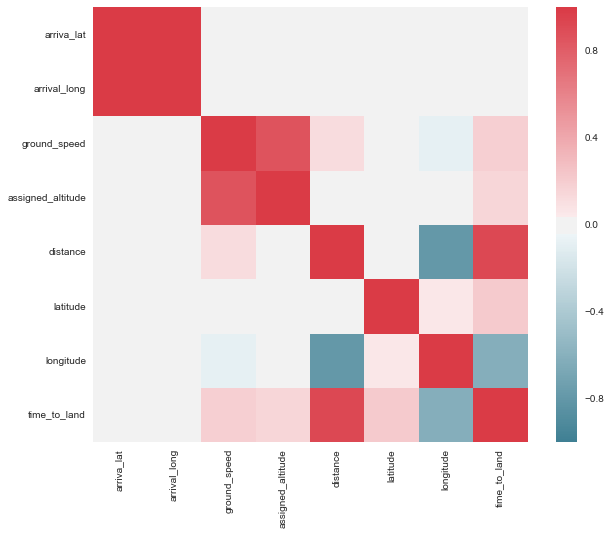

In [1197]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [1198]:
#data.drop(data.columns[[0,1,2,3,11,12,13]],axis=1,inplace=True)

In [1199]:
data.columns

Index(['gufi', 'arrival_airport', 'departure_airport', 'source_facility',
       'arriva_lat', 'arrival_long', 'ground_speed', 'assigned_altitude',
       'distance', 'latitude', 'longitude', 'aircraft_type',
       'source_timestamp', 'on_actual', 'time_to_land'],
      dtype='object')

In [1200]:
data.dtypes

gufi                         object
arrival_airport              object
departure_airport            object
source_facility              object
arriva_lat                  float64
arrival_long                float64
ground_speed                  int64
assigned_altitude             int64
distance                    float64
latitude                    float64
longitude                   float64
aircraft_type                object
source_timestamp     datetime64[ns]
on_actual            datetime64[ns]
time_to_land                float64
dtype: object

In [1201]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [1202]:
data.columns

Index(['gufi', 'arrival_airport', 'departure_airport', 'source_facility',
       'arriva_lat', 'arrival_long', 'ground_speed', 'assigned_altitude',
       'distance', 'latitude', 'longitude', 'aircraft_type',
       'source_timestamp', 'on_actual', 'time_to_land'],
      dtype='object')

In [1203]:
## Distance Squared, 
## diff in lat and long respectively for each record (time stamp),
## delta lat , delta_long 

In [1204]:
### Feature Engineering two new columns :

data['distance_sqr']=(data['distance'])**2
data['distance_log']=np.log(data['distance'])


{'boxes': [<matplotlib.lines.Line2D at 0x2c0bf4a8>],
 'caps': [<matplotlib.lines.Line2D at 0x2c0c8f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c2e5898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2c0ce9b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2c0bfe48>,
  <matplotlib.lines.Line2D at 0x2c0c86d8>]}

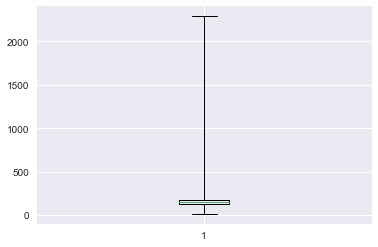

In [1205]:
plt.figure()
plt.boxplot(data['distance'],whis='range')

In [1206]:
data=data[data['distance']<1500]

# just to remove a bit of leverage techincally becuase of huge distances , and removing few outliers

In [1207]:
data=data[data.distance<1500]
data.head()

,gufi,arrival_airport,departure_airport,source_facility,arriva_lat,arrival_long,ground_speed,assigned_altitude,distance,latitude,longitude,aircraft_type,source_timestamp,on_actual,time_to_land,distance_sqr,distance_log
0,AAL1121.RDU.CLT.170618.2016.0096.TFM,KCLT,KRDU,KZDC,35.213,-80.949,152,23,130.501529,35.858610,-78.821390,B738,2017-06-20 00:32:00,2017-06-20 01:03:00,30.900000,17030.649097,4.871385
1,AAL1121.RDU.CLT.170618.2016.0096.TFM,KCLT,KRDU,KZTL,35.213,-80.949,170,30,130.461131,35.846386,-78.839170,B738,2017-06-20 00:32:00,2017-06-20 01:03:00,30.566667,17020.106754,4.871075
2,AAL1121.RDU.CLT.170618.2016.0096.TFM,KCLT,KRDU,KZDC,35.213,-80.949,190,47,130.746851,35.821110,-78.866940,B738,2017-06-20 00:33:00,2017-06-20 01:03:00,29.900000,17094.739020,4.873263
3,AAL1121.RDU.CLT.170618.2016.0096.TFM,KCLT,KRDU,KZTL,35.213,-80.949,204,60,130.353039,35.811110,-78.892220,B738,2017-06-20 00:33:00,2017-06-20 01:03:00,29.533333,16991.914829,4.870246
4,AAL1121.RDU.CLT.170618.2016.0096.TFM,KCLT,KRDU,KZDC,35.213,-80.949,222,75,128.423839,35.816110,-78.938614,B738,2017-06-20 00:34:00,2017-06-20 01:03:00,28.833333,16492.682321,4.855336


# Features and Targets 

In [1124]:
X=data.ix[:,[6,7,8,9,10,15,16]]
X.head(1)
Y=data.ix[:,'time_to_land']
Y.head(2)

,ground_speed,assigned_altitude,distance,latitude,longitude,distance_sqr,distance_log
0,152,23,130.501529,35.85861,-78.82139,17030.649097,4.871385


0    30.900000
1    30.566667
Name: time_to_land, dtype: float64

# Model Fitting 

In [1125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1126]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# MODEL Evaluation

In [1127]:
for a,b  in zip(X.columns, reg.coef_):
    print(a+':' +' ' +str(round(b,6)))
print('R Squared Value ',reg.score(X_test,Y_test))

ground_speed: -0.064533
assigned_altitude: 0.190147
distance: 0.371602
latitude: 3.255739
longitude: 1.246344
distance_sqr: -0.000124
distance_log: -30.021779
R Squared Value  0.912287966325


In [1128]:
print('R Squared Value ',reg.score(X_test,Y_test))

R Squared Value  0.912287966325


In [1129]:
print('Trainning Error Evaluation')
print('MSE for the Training Model :', mean_squared_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('Mean absolute error for Training :',mean_absolute_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('\nTesting Error Evaluation')
print('MSE for the Test Model :',mean_squared_error(y_true=Y_test,y_pred=reg.predict(X_test)))
print('Mean absolute error for Test :',mean_absolute_error(y_true=Y_test,y_pred=reg.predict(X_test)))

Trainning Error Evaluation
MSE for the Training Model : 70.6200497186
Mean absolute error for Training : 5.58128398233

Testing Error Evaluation
MSE for the Test Model : 70.2939434849
Mean absolute error for Test : 5.59878502475


# Three Subsets for Distances :

In [1174]:
data_close = data[data.distance <50]
data_mid   = data[(data.distance  < 150) & (data.distance > 50)]
data_Far   =  data[data.distance > 150]

In [1181]:
data_close.gufi.unique()

array(['PDT4829.ROA.CLT.170611.2020.0026.TFM',
       'PDT4829.ROA.CLT.170619.2020.0023.TFM',
       'PDT4829.ROA.CLT.170622.2020.0047.TFM',
       'PDT4842.ROA.CLT.170604.1950.0112.TFM',
       'PDT4842.ROA.CLT.170613.2150.0040.TFM',
       'PDT4842.ROA.CLT.170618.2151.0059.TFM',
       'PDT4842.ROA.CLT.170626.2150.0139.TFM',
       'PDT4879.ROA.CLT.170625.1640.0061.TFM',
       'PDT4879.ROA.CLT.170626.1640.0141.TFM',
       'PDT4926.ROA.CLT.170611.1830.0041.TFM',
       'PDT4926.ROA.CLT.170616.1830.0054.TFM',
       'PDT4926.ROA.CLT.170621.1830.0047.TFM',
       'PDT4972.ROA.CLT.170622.1325.0050.TFM',
       'SRY8011.LWB.CLT.170612.1516.0008.TFM',
       'SRY8011.LWB.CLT.170625.1526.0048.TFM',
       'SRY8011.LWB.CLT.170628.1748.0004.TFM'], dtype=object)

In [1210]:
data_close.shape
data_mid.shape
data_Far.shape
data.shape
data.source_timestamp.max()
data.distance.max()

(265, 17)

(22925, 17)

(18058, 17)

(41248, 17)

Timestamp('2017-06-29 15:45:00')

1319.239834

In [1208]:
data[data.gufi=='AAL1153.JFK.CLT.170626.1215.0172.TFM']

,gufi,arrival_airport,departure_airport,source_facility,arriva_lat,arrival_long,ground_speed,assigned_altitude,distance,latitude,longitude,aircraft_type,source_timestamp,on_actual,time_to_land,distance_sqr,distance_log
43,AAL1153.JFK.CLT.170626.1215.0172.TFM,KCLT,KJFK,KN90,35.213,-80.949,149,8,428.063435,40.650000,-73.766670,B752,2017-06-27 13:02:00,2017-06-27 14:48:00,105.983333,183238.304555,6.059271
44,AAL1153.JFK.CLT.170626.1215.0172.TFM,KCLT,KJFK,KZNY,35.213,-80.949,163,16,428.965336,40.660557,-73.755000,B752,2017-06-27 13:03:00,2017-06-27 14:48:00,105.583333,184011.259232,6.061376
45,AAL1153.JFK.CLT.170626.1215.0172.TFM,KCLT,KJFK,KN90,35.213,-80.949,202,22,430.156008,40.666668,-73.733330,B752,2017-06-27 13:03:00,2017-06-27 14:48:00,105.366667,185034.191046,6.064148
46,AAL1153.JFK.CLT.170626.1215.0172.TFM,KCLT,KJFK,KZDC,35.213,-80.949,196,22,430.190660,40.668335,-73.733890,B752,2017-06-27 13:03:00,2017-06-27 14:48:00,105.250000,185064.003951,6.064229
47,AAL1153.JFK.CLT.170626.1215.0172.TFM,KCLT,KJFK,KZNY,35.213,-80.949,223,43,432.984440,40.668335,-73.671660,B752,2017-06-27 13:04:00,2017-06-27 14:48:00,104.533333,187475.525109,6.070702
48,AAL1153.JFK.CLT.170626.1215.0172.TFM,KCLT,KJFK,KN90,35.213,-80.949,239,47,433.899510,40.666668,-73.650000,B752,2017-06-27 13:04:00,2017-06-27 14:48:00,104.366667,188268.785125,6.072813
49,AAL1153.JFK.CLT.170626.1215.0172.TFM,KCLT,KJFK,KZDC,35.213,-80.949,222,47,434.026382,40.667778,-73.648056,B752,2017-06-27 13:04:00,2017-06-27 14:48:00,104.200000,188378.900446,6.073105
50,AAL1153.JFK.CLT.170626.1215.0172.TFM,KCLT,KJFK,KZNY,35.213,-80.949,241,57,434.247283,40.631386,-73.614720,B752,2017-06-27 13:05:00,2017-06-27 14:48:00,103.533333,188570.703227,6.073614
51,AAL1153.JFK.CLT.170626.1215.0172.TFM,KCLT,KJFK,KN90,35.213,-80.949,267,62,433.644053,40.616665,-73.616670,B752,2017-06-27 13:05:00,2017-06-27 14:48:00,103.366667,188047.164962,6.072224
52,AAL1153.JFK.CLT.170626.1215.0172.TFM,KCLT,KJFK,KZDC,35.213,-80.949,246,63,433.080587,40.612778,-73.626114,B752,2017-06-27 13:05:00,2017-06-27 14:48:00,103.183333,187558.794576,6.070924


In [1182]:
data_Far.gufi.unique()

array(['AAL1153.JFK.CLT.170626.1215.0172.TFM',
       'AAL1331.AUA.CLT.170606.2046.0065.TFM',
       'AAL1356.IAH.CLT.170616.1201.0272.TFM',
       'AAL1356.IAH.CLT.170617.1200.0270.TFM',
       'AAL1397.JFK.CLT.170618.1701.0023.TFM',
       'AAL1435.DFW.CLT.170615.1355.0133.TFM',
       'AAL1435.DFW.CLT.170618.1355.0158.TFM',
       'AAL1477.BWI.CLT.170617.1440.0099.TFM',
       'AAL1489.PBI.CLT.170627.1215.0061.TFM',
       'AAL1564.EWR.CLT.170621.1935.0186.TFM',
       'AAL1564.EWR.CLT.170626.1935.0192.TFM',
       'AAL1565.SJC.CLT.170608.0510.0009.TFM',
       'AAL1608.STT.CLT.170617.2046.0006.TFM',
       'AAL1643.PHL.CLT.170623.1100.0233.TFM',
       'AAL1655.DCA.CLT.170604.1931.0143.TFM',
       'AAL1655.DCA.CLT.170606.1930.0124.TFM',
       'AAL1655.DCA.CLT.170622.1931.0174.TFM',
       'AAL1656.SYR.CLT.170607.2316.0088.TFM',
       'AAL1656.SYR.CLT.170608.2315.0144.TFM',
       'AAL1656.SYR.CLT.170612.2315.0137.TFM',
       'AAL1673.PIT.CLT.170627.1801.0043.TFM',
       'AAL16

In [1185]:
data.gufi='AAL1153.JFK.CLT.170626.1215.0172.TFM'

In [1132]:
data.distance.mean()
data.distance.max()
data.distance.min()

199.76387183972236

1319.239834

12.8342729

In [1133]:
X=data_close.ix[:,[6,7,8,9,10,15,16]]
X.head(1)
Y=data_close.ix[:,'time_to_land']
Y.head(2)

,ground_speed,assigned_altitude,distance,latitude,longitude,distance_sqr,distance_log
35939,173,46,21.025646,37.220554,-80.038055,442.077782,3.045743


35939    34.633333
35940    34.400000
Name: time_to_land, dtype: float64

In [1134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1135]:
for a,b  in zip(X.columns, reg.coef_):
    print(a+':' +' ' +str(round(b,6)))
    
print('\n R Squared Value ',reg.score(X_test,Y_test))

ground_speed: -0.027387
assigned_altitude: 0.005218
distance: -1.040348
latitude: 11.59568
longitude: 12.291573
distance_sqr: 0.012478
distance_log: 6.360089

 R Squared Value  0.428036223593


In [1136]:
print('Trainning Error Evaluation')
print('MSE for the Training Model :', mean_squared_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('Mean absolute error for Training :',mean_absolute_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('\nTesting Error Evaluation')
print('MSE for the Test Model :',mean_squared_error(y_true=Y_test,y_pred=reg.predict(X_test)))
print('Mean absolute error for Test :',mean_absolute_error(y_true=Y_test,y_pred=reg.predict(X_test)))

Trainning Error Evaluation
MSE for the Training Model : 20.2196865023
Mean absolute error for Training : 4.09247116719

Testing Error Evaluation
MSE for the Test Model : 17.6880178393
Mean absolute error for Test : 3.85949329079


In [1137]:
X=data_mid.ix[:,[6,7,8,9,10,15,16]]
X.head(1)
Y=data_mid.ix[:,'time_to_land']
Y.head(2)

,ground_speed,assigned_altitude,distance,latitude,longitude,distance_sqr,distance_log
0,152,23,130.501529,35.85861,-78.82139,17030.649097,4.871385


0    30.900000
1    30.566667
Name: time_to_land, dtype: float64

In [1138]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [1139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1140]:
for a,b  in zip(X.columns, reg.coef_):
    print(a+':' +' ' +str(round(b,6)))
    
print('\n R Squared Value ',reg.score(X_test,Y_test))

ground_speed: -0.009633
assigned_altitude: 0.117398
distance: 2.216081
latitude: 14.83787
longitude: 3.158521
distance_sqr: -0.004209
distance_log: -124.790749

 R Squared Value  0.829296916993


In [1141]:
X=data_Far.ix[:,[6,7,8,9,10,15,16]]
X.head(1)
Y=data_Far.ix[:,'time_to_land']
Y.head(2)

,ground_speed,assigned_altitude,distance,latitude,longitude,distance_sqr,distance_log
43,149,8,428.063435,40.65,-73.76667,183238.304555,6.059271


43    105.983333
44    105.583333
Name: time_to_land, dtype: float64

In [1142]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [1143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1144]:
for a,b  in zip(X.columns, reg.coef_):
    print(a+':' +' ' +str(round(b,6)))
    
print('\n R Squared Value ',reg.score(X_test,Y_test))

ground_speed: -0.080829
assigned_altitude: 0.121956
distance: -0.16153
latitude: 2.429765
longitude: 1.002296
distance_sqr: 0.000107
distance_log: 86.640192

 R Squared Value  0.939104206999


In [1145]:
print('Trainning Error Evaluation')
print('MSE for the Training Model :', mean_squared_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('Mean absolute error for Training :',mean_absolute_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('\nTesting Error Evaluation')
print('MSE for the Test Model :',mean_squared_error(y_true=Y_test,y_pred=reg.predict(X_test)))
print('Mean absolute error for Test :',mean_absolute_error(y_true=Y_test,y_pred=reg.predict(X_test)))

Trainning Error Evaluation
MSE for the Training Model : 83.9197542461
Mean absolute error for Training : 6.43317990477

Testing Error Evaluation
MSE for the Test Model : 79.8664922085
Mean absolute error for Test : 6.30415072695


In [1155]:
y_hat=reg.predict(X_test)
error=abs(y_hat-Y_test)
error_df=pd.DataFrame({'INDEX':error.index, 'Error':error.values})

In [1156]:
error_df=error_df.set_index('INDEX')
error_df.head(2)

,Error
INDEX,
34860,2.635052
24553,4.648761


In [1161]:
X_test.head(2)

,ground_speed,assigned_altitude,distance,latitude,longitude,distance_sqr,distance_log
34860,202,30,152.156405,35.079998,-80.92305,23151.571674,5.024909
24553,372,112,286.117104,33.122220,-79.94833,81862.997201,5.656401


In [1166]:
final=pd.concat([X_test,error_df],axis=1)
final.head(2)

,ground_speed,assigned_altitude,distance,latitude,longitude,distance_sqr,distance_log,Error
INDEX,,,,,,,,
34860,202,30,152.156405,35.079998,-80.92305,23151.571674,5.024909,2.635052
24553,372,112,286.117104,33.122220,-79.94833,81862.997201,5.656401,4.648761


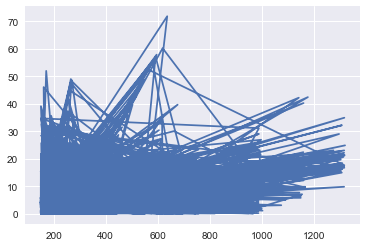

In [1167]:
plt.plot(final.distance,final.Error)

In [1170]:
final.distance.max()
final.distance.min()

1319.239834

150.00105959999999

(array([ 4039.,   540.,   485.,   324.,   208.,   128.,    89.,    96.,
           19.,    32.]),
 array([  150.0010596 ,   266.92493704,   383.84881448,   500.77269192,
          617.69656936,   734.6204468 ,   851.54432424,   968.46820168,
         1085.39207912,  1202.31595656,  1319.239834  ]),
 <a list of 10 Patch objects>)

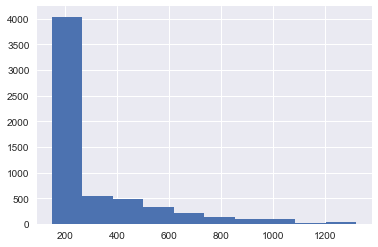

In [1171]:
plt.hist(final.distance,bins=10)

In [1230]:
import psycopg2
import datetime
import pandas
pandas.set_option('display.max_columns', None)

In [1242]:
try:
    conn = psycopg2.connect("dbname='clt_mpe_analysis' user='fuser' host='matm-pg04' password='fuser'")
    print ("Connected to database")
except:
    print ("I am unable to connect to the database")


Connected to database


In [1253]:
#import psycopg2
#conn = psycopg2.connect("dbname='db' user='user' host='host' password='pass'"35.213 as arrival_lat, -80.949 as arrival_long,)
cur = conn.cursor()
cur.execute("select gufi,35.213 as arrival_lat, -80.949 as arrival_long,ground_speed,assigned_altitude,assigned_altitude_max,2 * 3961 * asin(sqrt((sin(radians((latitude - 35.21375) / 2))) ^ 2 + cos(radians(latitude)) * cos(radians(35.21375)) * (sin(radians((longitude -(-80.94906)) / 2))) ^ 2)) as distance,latitude,longitude,aircraft_type,source_timestamp,on_actual,(extract( Epoch from (on_actual))-EXTRACT(EPOCH FROM (source_timestamp)))/60 as time_to_land from lk_merged")
data = pd.DataFrame(cur.fetchall(), columns=['gufi','arrival_lat','arrival_long','ground_speed','assigned_altitude',
                                             'assigned_altitude','distance_miles','latitude','longitude','aircraft_type','source_timestamp','on_actual','time_to_land'])




In [1255]:
data.count()
data.shape
data.dtypes

gufi                 126378
arrival_lat          126378
arrival_long         126378
ground_speed         126378
assigned_altitude    126378
assigned_altitude         0
distance_miles       126378
latitude             126378
longitude            126378
aircraft_type        126378
source_timestamp     126378
on_actual            126378
time_to_land         126378
dtype: int64

(126378, 13)

gufi                         object
arrival_lat                  object
arrival_long                 object
ground_speed                  int64
assigned_altitude             int64
assigned_altitude            object
distance_miles              float64
latitude                    float64
longitude                   float64
aircraft_type                object
source_timestamp     datetime64[ns]
on_actual            datetime64[ns]
time_to_land                float64
dtype: object